In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

Task - 1

In [4]:
X, y = make_moons(n_samples=500, noise=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.3, random_state=42
)

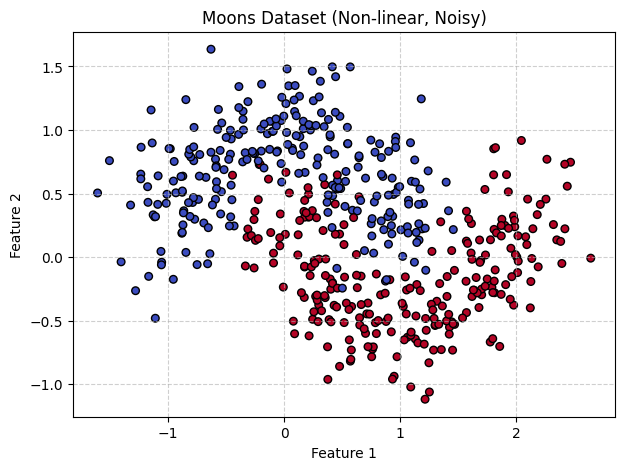

In [5]:
plt.figure(figsize=(7, 5))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=30, edgecolor='k')
plt.title("Moons Dataset (Non-linear, Noisy)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [6]:
# Step 3: Standardize Features (important for SVM)
scaler = StandardScaler()
scaler.fit(X_train)  # Fit only on training data

StandardScaler()

In [7]:
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)

Task - 2

In [26]:
linear_model = SVC(kernel='linear', C=1.0, random_state=42)
linear_model.fit(X_train_scaled, y_train)

SVC(kernel='linear', random_state=42)

In [10]:
y_pred_linear = linear_model.predict(X_val_scaled)

In [11]:
print("=== Linear SVM Evaluation ===")
print(classification_report(y_val, y_pred_linear))
linear_acc = accuracy_score(y_val, y_pred_linear)
print("Validation Accuracy:", linear_acc, "\n")

=== Linear SVM Evaluation ===
              precision    recall  f1-score   support

           0       0.84      0.87      0.86        75
           1       0.86      0.84      0.85        75

    accuracy                           0.85       150
   macro avg       0.85      0.85      0.85       150
weighted avg       0.85      0.85      0.85       150

Validation Accuracy: 0.8533333333333334 



## Analysis:
- The linear SVM fails to perfectly classify the 'moons' dataset because the data is non-linearly separable.
- The parameter C controls the trade-off between margin width and misclassification.
- A smaller C (like 0.01) makes the model more tolerant to misclassification, increasing the margin but lowering accuracy.

Task 3

In [13]:
rbf_model = SVC(kernel='rbf', random_state=42)
rbf_model.fit(X_train_scaled, y_train)
y_pred_rbf = rbf_model.predict(X_val_scaled)

print("=== RBF Kernel SVM Evaluation ===")
print(classification_report(y_val, y_pred_rbf))
rbf_acc = accuracy_score(y_val, y_pred_rbf)
print("Validation Accuracy:", rbf_acc, "\n")

=== RBF Kernel SVM Evaluation ===
              precision    recall  f1-score   support

           0       0.91      0.99      0.95        75
           1       0.99      0.91      0.94        75

    accuracy                           0.95       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150

Validation Accuracy: 0.9466666666666667 



In [14]:
poly_model = SVC(kernel='poly', degree=3, random_state=42)
poly_model.fit(X_train_scaled, y_train)
y_pred_poly = poly_model.predict(X_val_scaled)

print("=== Polynomial Kernel SVM Evaluation ===")
print(classification_report(y_val, y_pred_poly))
poly_acc = accuracy_score(y_val, y_pred_poly)
print("Validation Accuracy:", poly_acc, "\n")

=== Polynomial Kernel SVM Evaluation ===
              precision    recall  f1-score   support

           0       0.83      0.93      0.88        75
           1       0.92      0.81      0.87        75

    accuracy                           0.87       150
   macro avg       0.88      0.87      0.87       150
weighted avg       0.88      0.87      0.87       150

Validation Accuracy: 0.8733333333333333 



In [15]:
print("=== Validation Accuracy Comparison ===")
print(f"{'Model':<20}{'Accuracy':<10}")
print(f"{'-'*30}")
print(f"{'Linear Kernel':<20}{linear_acc:.4f}")
print(f"{'RBF Kernel':<20}{rbf_acc:.4f}")
print(f"{'Polynomial Kernel':<20}{poly_acc:.4f}\n")

=== Validation Accuracy Comparison ===
Model               Accuracy  
------------------------------
Linear Kernel       0.8533
RBF Kernel          0.9467
Polynomial Kernel   0.8733



## Analysis:
- The RBF kernel performs the best with default parameters.
- This makes sense because the 'moons' dataset is non-linear, and the RBF kernel can model curved boundaries effectively.

Task - 4

In [17]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.1, 1, 10, 100],
    'kernel': ['rbf']
}

In [18]:
grid = GridSearchCV(
    SVC(random_state=42),
    param_grid,
    refit=True,
    verbose=2,
    cv=5,
    scoring='accuracy'
)

In [19]:
print("Running Grid Search... (this may take a few seconds)")
grid.fit(X_train_scaled, y_train)

Running Grid Search... (this may take a few seconds)
Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=10, kernel=rbf; total time=   

GridSearchCV(cv=5, estimator=SVC(random_state=42),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [0.1, 1, 10, 100],
                         'kernel': ['rbf']},
             scoring='accuracy', verbose=2)

In [20]:
print("\n=== Grid Search Results ===")
print("Best Parameters:", grid.best_params_)
print("Best Cross-Validated Accuracy:", grid.best_score_, "\n")


=== Grid Search Results ===
Best Parameters: {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
Best Cross-Validated Accuracy: 0.9514285714285714 



Task 5

In [22]:
final_predictions = grid.predict(X_val_scaled)
print("=== Final Model Evaluation on Hold-Out Set ===")
print(classification_report(y_val, final_predictions))

=== Final Model Evaluation on Hold-Out Set ===
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        75
           1       1.00      0.93      0.97        75

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



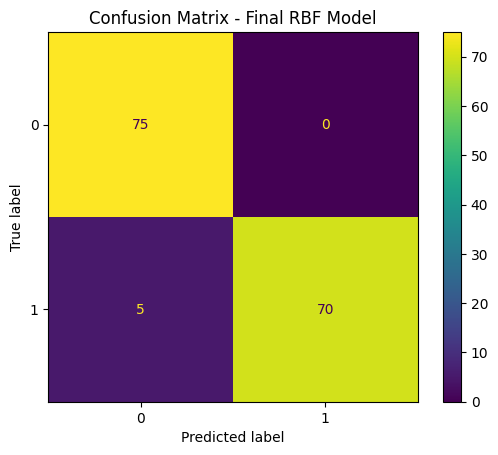

In [31]:
cm = confusion_matrix(y_val, final_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot( cmap='viridis', colorbar=True)
plt.title("Confusion Matrix - Final RBF Model")
plt.show()

In [24]:

def plot_decision_boundary(model, X, y, ax, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)
    ax.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k', cmap=plt.cm.coolwarm)
    ax.set_title(title)

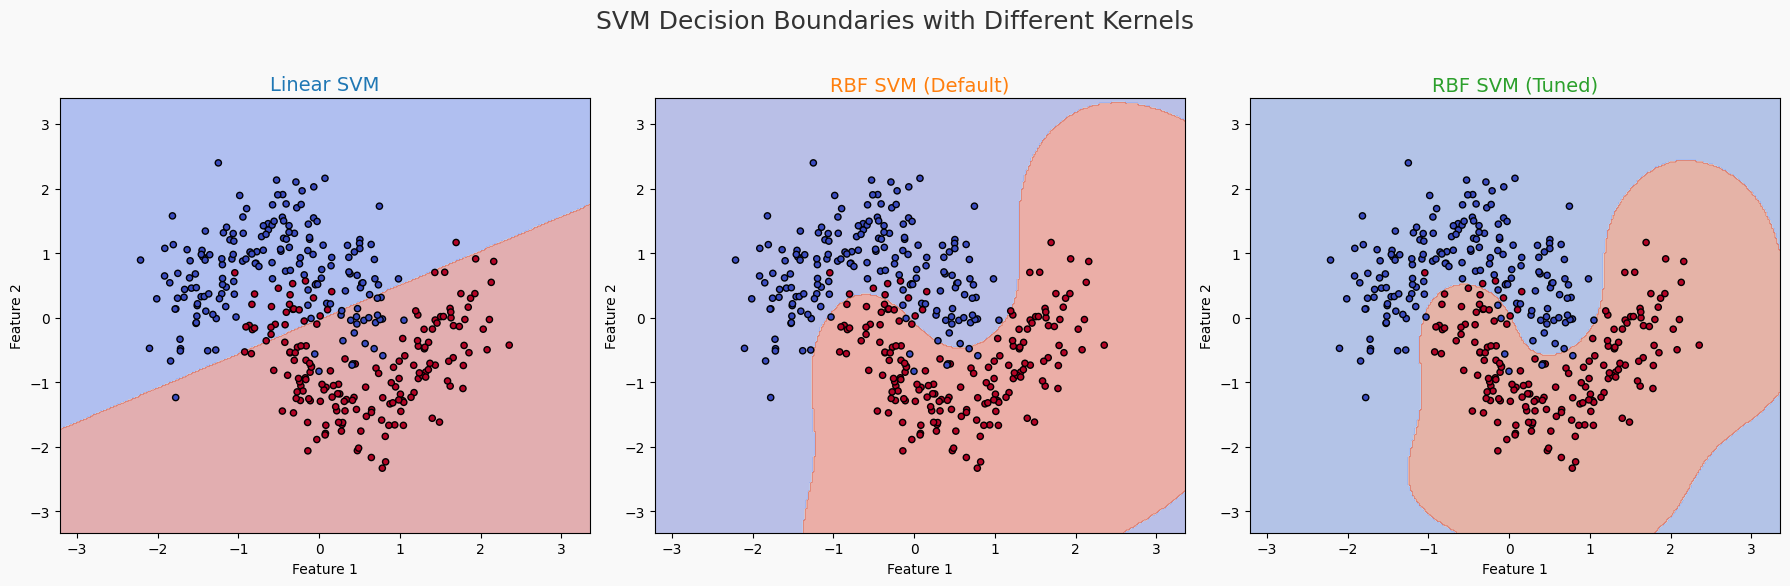

In [28]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), facecolor="#f9f9f9")

plot_decision_boundary(linear_model, X_train_scaled, y_train, axes[0], "Linear SVM")
axes[0].set_facecolor("#f0f7ff")
axes[0].set_xlabel("Feature 1")
axes[0].set_ylabel("Feature 2")
axes[0].set_title("Linear SVM", fontsize=14, color="#1f77b4")

plot_decision_boundary(rbf_model, X_train_scaled, y_train, axes[1], "RBF SVM (Default)")
axes[1].set_facecolor("#fff7f0")
axes[1].set_xlabel("Feature 1")
axes[1].set_ylabel("Feature 2")
axes[1].set_title("RBF SVM (Default)", fontsize=14, color="#ff7f0e")

plot_decision_boundary(grid.best_estimator_, X_train_scaled, y_train, axes[2], "RBF SVM (Tuned)")
axes[2].set_facecolor("#f5fff0")
axes[2].set_xlabel("Feature 1")
axes[2].set_ylabel("Feature 2")
axes[2].set_title("RBF SVM (Tuned)", fontsize=14, color="#2ca02c")

fig.suptitle("SVM Decision Boundaries with Different Kernels", fontsize=18, color="#333333", y=0.97)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
